<h1> Zeros de Função - Comparativo</h1>
<h3> Testes dos métodos implementados em C (via DLL)</h3>

In [1]:
import ctypes
import numpy as np
import matplotlib.pyplot as plt

# Carrega a biblioteca (deve ser a DLL atualizada)
lib = ctypes.CDLL("./metodos.dll")

# Tipo de ponteiro para função C (double func(double))
FUNC_TYPE = ctypes.CFUNCTYPE(ctypes.c_double, ctypes.c_double)

# --- Funções de Teste (f1, d1) ---
lib.f1.restype = ctypes.c_double
lib.f1.argtypes = [ctypes.c_double]
f1_cfunc = FUNC_TYPE(lib.f1)

lib.d1.restype = ctypes.c_double
lib.d1.argtypes = [ctypes.c_double]
d1_cfunc = FUNC_TYPE(lib.d1)

# --- 1. Método da Bisseção ---
lib.metodo_bissecao.restype = ctypes.c_double
lib.metodo_bissecao.argtypes = [FUNC_TYPE, ctypes.c_double, ctypes.c_double, ctypes.c_double]

# --- 2. Método da Falsa Posição ---
lib.metodo_falsa_posicao.restype = ctypes.c_double
lib.metodo_falsa_posicao.argtypes = [FUNC_TYPE, ctypes.c_double, ctypes.c_double, ctypes.c_double]

# --- 3. Newton-Raphson ---
lib.newton_raphson.restype = ctypes.c_double
lib.newton_raphson.argtypes = [FUNC_TYPE, FUNC_TYPE, ctypes.c_double, ctypes.c_double]

# --- 4. Método das Secantes ---
lib.metodo_das_secantes.restype = ctypes.c_double
lib.metodo_das_secantes.argtypes = [FUNC_TYPE, ctypes.c_double, ctypes.c_double, ctypes.c_double]

## Comparando os Métodos para $f(x) = x^2 - 2$


--- Resultados ---
Valor Esperado (sqrt(2)) : 1.414213562373095
Bisseção                 : 1.414213657379150
Falsa Posição            : 1.414213272990373
Newton-Raphson           : 1.414213780047198
Secantes                 : 1.414213445713896


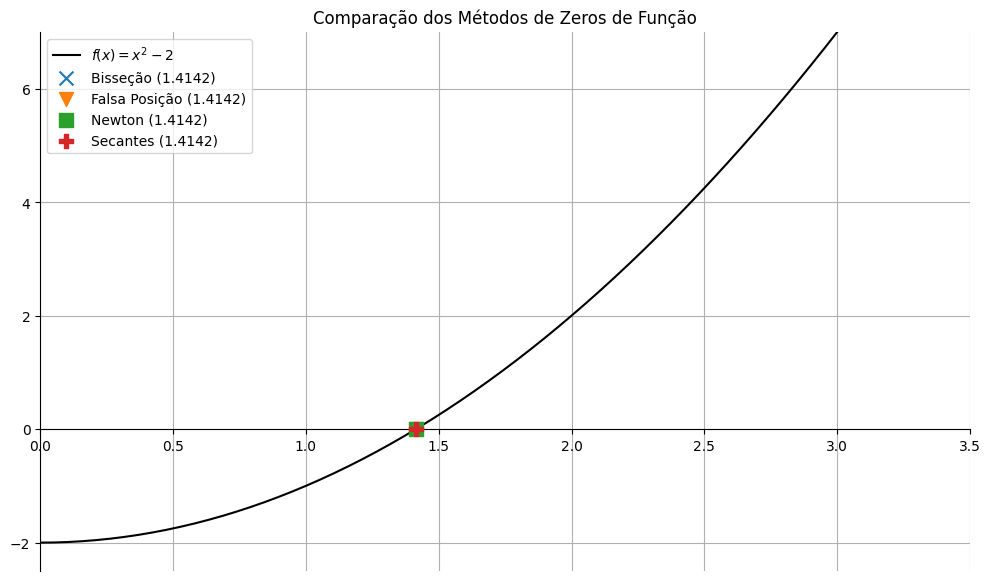

In [2]:
epsilon = 0.000001

# Intervalo inicial [a, b] para Bisseção e Falsa Posição
a, b = 1.0, 3.0
# Chute inicial para Newton-Raphson
x_newton = 3.0
# Intervalo [x1, x2] para Secantes
x1_sec, x2_sec = 1.0, 3.0

# Calcula as raízes usando os métodos da DLL
raiz_bissecao = lib.metodo_bissecao(f1_cfunc, a, b, epsilon)
raiz_falsapos = lib.metodo_falsa_posicao(f1_cfunc, a, b, epsilon)
raiz_newton = lib.newton_raphson(f1_cfunc, d1_cfunc, x_newton, epsilon)
raiz_secantes = lib.metodo_das_secantes(f1_cfunc, x1_sec, x2_sec, epsilon)

resultados = {
    "Valor Esperado (sqrt(2))": np.sqrt(2),
    "Bisseção": raiz_bissecao,
    "Falsa Posição": raiz_falsapos,
    "Newton-Raphson": raiz_newton,
    "Secantes": raiz_secantes
}

print("--- Resultados ---")
for metodo, valor in resultados.items():
    print(f"{metodo:<25}: {valor:.15f}")

# --- Plotagem ---
plt.figure(figsize=(12, 7))

# Plota a função f(x)
xs = np.linspace(0, 3.5, 200)
ys = [lib.f1(float(x)) for x in xs]
plt.plot(xs, ys, color='black', label=r'$f(x) = x^2 - 2$')

# Plota os resultados
plt.scatter(raiz_bissecao, 0, label=f'Bisseção ({raiz_bissecao:.4f})', s=100, zorder=5, marker='x')
plt.scatter(raiz_falsapos, 0, label=f'Falsa Posição ({raiz_falsapos:.4f})', s=100, zorder=5, marker='v')
plt.scatter(raiz_newton, 0, label=f'Newton ({raiz_newton:.4f})', s=100, zorder=5, marker='s')
plt.scatter(raiz_secantes, 0, label=f'Secantes ({raiz_secantes:.4f})', s=100, zorder=5, marker='P')

# Configurações do gráfico
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
plt.legend()
plt.title('Comparação dos Métodos de Zeros de Função')
plt.ylim(-2.5, 7)
plt.xlim(0, 3.5)
plt.grid(True)
plt.show()